In [70]:
import cupy as cp
import numpy as np
import time
import math
from importlib.machinery import SourceFileLoader
from scipy.special import erf
import matplotlib.pyplot as plt
from massshape import *

In [71]:
config_mass_shape_output = SourceFileLoader('config_mass_shape_output', '/software/pc24403/PCBPGGSZ/outputs/toy/mass_fit/config/%s'%('config_mass_shape_output_1.py')).load_module()
varDict = config_mass_shape_output.getconfig()
Bu_M = cp.linspace(5080, 5800, 1000)

In [72]:
varDict['low_sigma_k_DD'] = varDict['low_sigma_pi_DD']/varDict['low_sigma_pi_over_k_ratio']
varDict['low_sigma_k_LL'] = varDict['low_sigma_pi_LL']/varDict['low_sigma_pi_over_k_ratio']

pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL = HORNSdini(Bu_M, varDict['low_a_Bu_Dstar0h_D0pi0_dk'], varDict['low_b_Bu_Dstar0h_D0pi0_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_LL'], varDict['low_ratio_pi'], varDict['low_f_pi'])
pdf_sig_Gauss_DK_KsPiPi_DD = Gaussian(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'])
pdf_comb_DPi_KsPiPi_LL = Exponential(Bu_M, varDict['comb_const_dpi_d2kspp_LL'])
pdf_low_misID_Bu_Dstar0h_D0pi0_DK_KsPiPi_LL = HORNSdini_misID(Bu_M, varDict['low_a_B2Dpipi_misID'], varDict['low_b_B2Dpipi_misID'], varDict['low_csi_B2Dpipi'], varDict['low_m1_B2Dpipi_misID'], varDict['low_s1_B2Dpipi_misID'], varDict['low_m2_B2Dpipi_misID'], varDict['low_s2_B2Dpipi_misID'], varDict['low_m3_B2Dpipi_misID'], varDict['low_s3_B2Dpipi_misID'], varDict['low_m4_B2Dpipi_misID'], varDict['low_s4_B2Dpipi_misID'], varDict['low_f1_B2Dpipi_misID'], varDict['low_f2_B2Dpipi_misID'], varDict['low_f3_B2Dpipi_misID'])
pdf_Bu_Dstar0h_D0gamma_DPi_KsPiPi_LL = HILLdini(Bu_M, varDict['low_a_Bu_Dstar0h_D0gamma_dpi'], varDict['low_b_Bu_Dstar0h_D0gamma_dpi'], varDict['low_csi_gamma'], varDict['low_global_shift'], varDict['low_sigma_gamma'],    varDict['low_ratio_gamma'], varDict['low_f_gamma'])
pdf_low_misID_Bu_Dstar0h_D0gamma_DK_KsPiPi_LL = HILLdini_misID(Bu_M, varDict['low_a_Bu_Dstar0h_D0gamma_dk'], varDict['low_b_Bu_Dstar0h_D0gamma_dk'], varDict['low_csi_gamma'], varDict['m1ga'], varDict['s1ga'], varDict['m2ga'], varDict['s2ga'], varDict['m3ga'], varDict['s3ga'], varDict['m4ga'], varDict['s4ga'], varDict['f1ga'], varDict['f2ga'], varDict['f3ga'])
pdf_sig_Cruijff_DK_KsPiPi_DD = CruijffExtended(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'], varDict['sigma_dk_DD'], varDict['DD_dk_Cruijff_alpha_L'], varDict['DD_dk_Cruijff_alpha_R'], varDict['Cruijff_beta'])


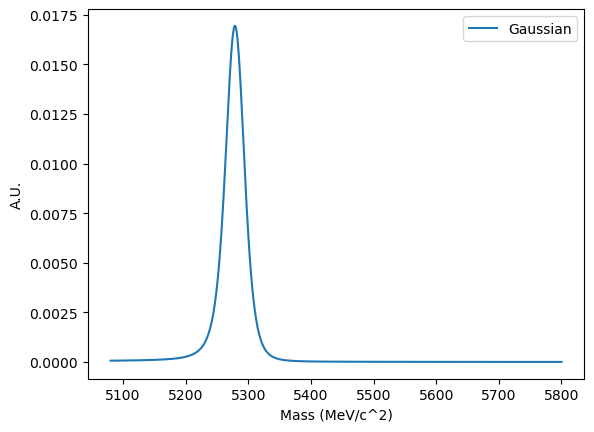

In [73]:
plt.plot(Bu_M.get(), norm_pdf(pdf_sig_Cruijff_DK_KsPiPi_DD).get(), label='Gaussian')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()

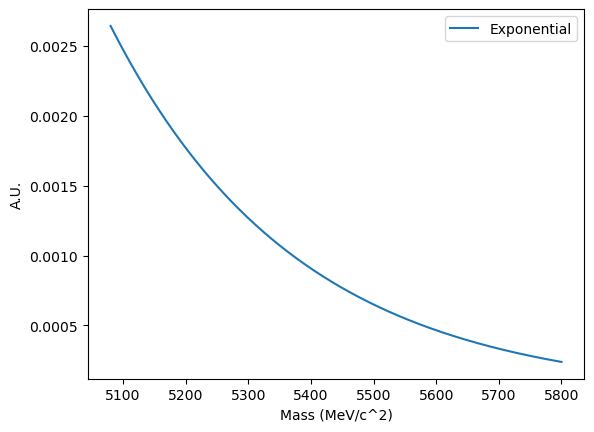

In [74]:
plt.plot(Bu_M.get(), norm_pdf(pdf_comb_DPi_KsPiPi_LL).get(), label='Exponential')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()


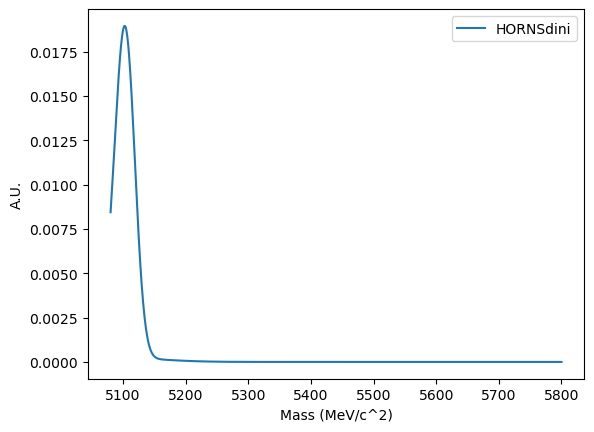

In [75]:
plt.plot(Bu_M.get(), norm_pdf(pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL).get(), label='HORNSdini')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()

In [76]:
pdf_misid_CB1_DK_KsPiPi_LL = CBShape(Bu_M, varDict['LL_d2kspp_dpi_to_dk_misID_mean1'], varDict['LL_d2kspp_dpi_to_dk_misID_width1'], varDict['LL_d2kspp_dpi_to_dk_misID_alpha1'], varDict['LL_d2kspp_dpi_to_dk_misID_n1'])

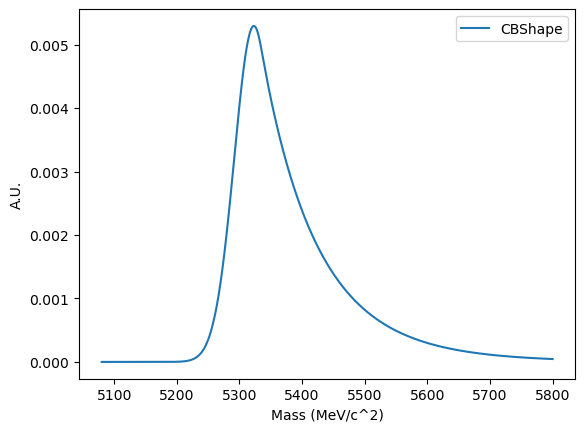

In [77]:
#plot 

plt.plot(Bu_M.get(), norm_pdf(pdf_misid_CB1_DK_KsPiPi_LL).get(), label='CBShape')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()
plt.show()

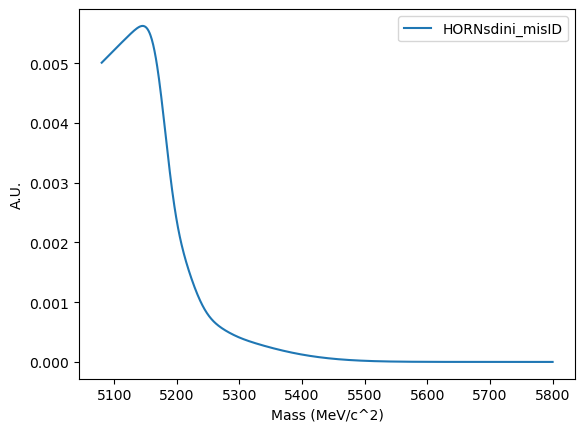

In [78]:
plt.plot(Bu_M.get(), norm_pdf(pdf_low_misID_Bu_Dstar0h_D0pi0_DK_KsPiPi_LL).get(), label='HORNsdini_misID')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()
plt.show()

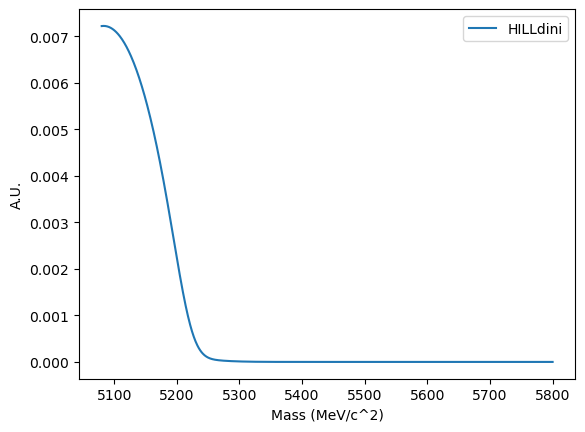

In [79]:
plt.plot(Bu_M.get(), norm_pdf(pdf_Bu_Dstar0h_D0gamma_DPi_KsPiPi_LL).get(), label='HILLdini')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()
plt.show()

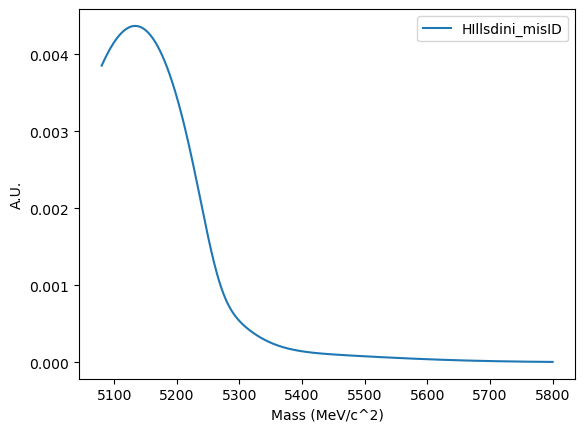

In [80]:
plt.plot(Bu_M.get(), norm_pdf(pdf_low_misID_Bu_Dstar0h_D0gamma_DK_KsPiPi_LL).get(), label='HIllsdini_misID')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()
plt.show()

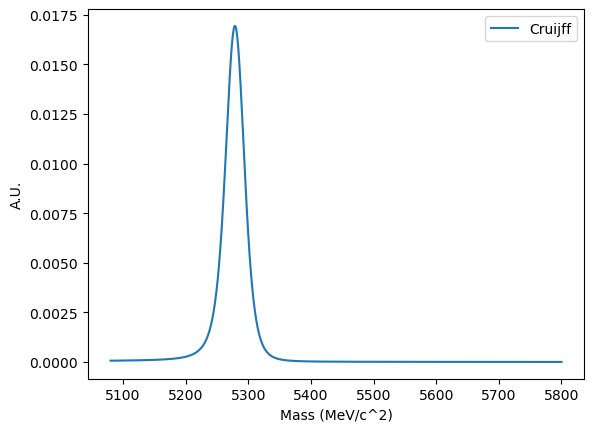

In [81]:
plt.plot(Bu_M.get(), norm_pdf(pdf_sig_Cruijff_DK_KsPiPi_DD.get()), label='Cruijff')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()

# Illustration of addPdf (correctly norm)

In [82]:
def addPdf(pdflist=[], frac=[]):
    if isinstance(pdflist, np.ndarray):
        pdflist = [pdflist]  # Wrap single numpy array in a list
    pdflist = [cp.array(pdf, dtype=float) for pdf in pdflist]  # Ensure all elements are numpy arrays

    if not isinstance(frac, list):
        frac = [frac]  # Convert single fraction to list

    # Initialize the PDF with zeros of the same shape as the first PDF in the list
    pdf = np.zeros_like(pdflist[0], dtype=float)

    # Normalize PDFs in pdflist if their sum is not exactly 1
    for i in range(len(pdflist)):
        if np.sum(pdflist[i]) != 1:
            pdflist[i] = norm_pdf(pdflist[i])


    if len(pdflist) != len(frac):
        if len(frac) ==1:
            pdf = frac[0]*pdflist[0] + (1-frac[0])*pdflist[1]

            return pdf
        else:
            return None and print('The length of the list of pdfs and the list of fractions must be the same')
    
    else:
        for i in range(len(pdflist)):
                pdf += frac[i]*pdflist[i]
        return pdf

In [83]:

new_pdf = addPdf([pdf_sig_Cruijff_DK_KsPiPi_DD, pdf_sig_Gauss_DK_KsPiPi_DD], varDict['LL_dk_Cruijff_frac'])

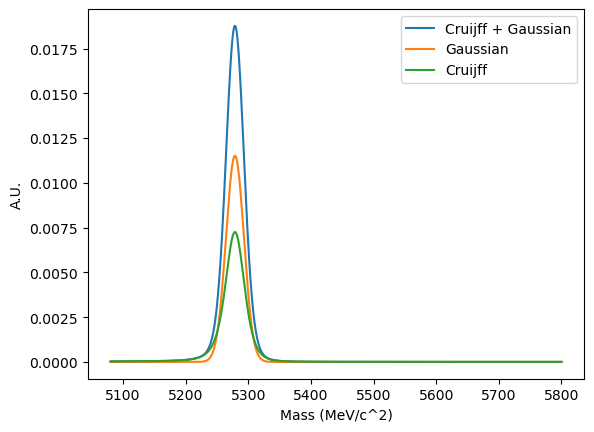

In [85]:
plt.plot(Bu_M.get(), new_pdf.get(), label='Cruijff + Gaussian')
plt.plot(Bu_M.get(), norm_pdf(pdf_sig_Gauss_DK_KsPiPi_DD).get()*(1-varDict['LL_dk_Cruijff_frac']), label='Gaussian')
plt.plot(Bu_M.get(), norm_pdf(pdf_sig_Cruijff_DK_KsPiPi_DD).get()*(varDict['LL_dk_Cruijff_frac']), label='Cruijff')

plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')

plt.legend()

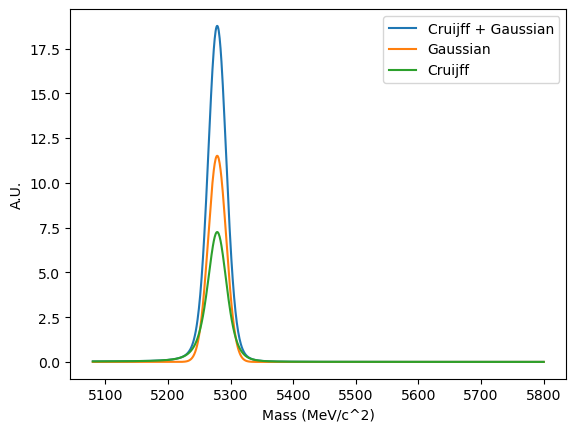

In [86]:
#Add yields
n_tot = len(Bu_M)
plt.plot(Bu_M.get(), new_pdf.get()*n_tot, label='Cruijff + Gaussian')
plt.plot(Bu_M.get(), norm_pdf(pdf_sig_Gauss_DK_KsPiPi_DD).get()*(1-varDict['LL_dk_Cruijff_frac'])*n_tot, label='Gaussian')
plt.plot(Bu_M.get(), norm_pdf(pdf_sig_Cruijff_DK_KsPiPi_DD).get()*(varDict['LL_dk_Cruijff_frac'])*n_tot, label='Cruijff')

plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')

plt.legend()